In [ ]:
!pip install vaderSentiment
!pip install demoji
!pip install pyspellchecker
!pip install LeIA-br

In [ ]:
import pandas as pd
import demoji
import nltk
from nltk.corpus import stopwords
from nltk.stem import PorterStemmer
from nltk.tokenize import word_tokenize
import string
import re
from spellchecker import SpellChecker
##
#from vaderSentiment.vaderSentiment import SentimentIntensityAnalyzer
#from textblob import TextBlob
from LeIA import SentimentIntensityAnalyzer

In [ ]:
nltk.download('stopwords')
nltk.download('punkt')

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!


True

In [ ]:
df = pd.read_csv(r'/content/ml_scrape_final.csv')

In [ ]:
df.head()

,Pesquisa,Titulo,Link,Comentario
0,smartphone,Smartphone Samsung Galaxy A14 Dual 6.6 128gb P...,https://produto.mercadolivre.com.br/MLB-331518...,A foto fica amarelada quando eu vou fotografar...
1,smartphone,Smartphone Samsung Galaxy A14 Dual 6.6 128gb P...,https://produto.mercadolivre.com.br/MLB-331518...,👏🏼👏🏼👏🏼👏🏼👏🏼👏🏼.
2,smartphone,Smartphone Samsung Galaxy A14 Dual 6.6 128gb P...,https://produto.mercadolivre.com.br/MLB-331518...,Muito bom.
3,smartphone,Smartphone Samsung Galaxy A14 Dual 6.6 128gb P...,https://produto.mercadolivre.com.br/MLB-331518...,Produto muito bom dei de presente pra meu filh...
4,smartphone,Smartphone Samsung Galaxy A14 Dual 6.6 128gb P...,https://produto.mercadolivre.com.br/MLB-331518...,Recomendo.


#Pré-processamento

In [ ]:
def preprocess_text_pt(text):
    stop_words = set(stopwords.words('portuguese'))
    text = ' '.join(word for word in text.split() if word not in stop_words)
    text = re.sub(r'[^\w\s]', '', text)
    text = text.lower()
    return text

In [ ]:
def remove_emojis(text):
    return demoji.replace(text, repl="")

In [ ]:
df['Comentario_pre'] = df['Comentario'].apply(preprocess_text_pt)

In [ ]:
df.head()

,Pesquisa,Titulo,Link,Comentario,Comentario_pre
0,smartphone,Smartphone Samsung Galaxy A14 Dual 6.6 128gb P...,https://produto.mercadolivre.com.br/MLB-331518...,A foto fica amarelada quando eu vou fotografar...,a foto fica amarelada vou fotografar celular
1,smartphone,Smartphone Samsung Galaxy A14 Dual 6.6 128gb P...,https://produto.mercadolivre.com.br/MLB-331518...,👏🏼👏🏼👏🏼👏🏼👏🏼👏🏼.,
2,smartphone,Smartphone Samsung Galaxy A14 Dual 6.6 128gb P...,https://produto.mercadolivre.com.br/MLB-331518...,Muito bom.,muito bom
3,smartphone,Smartphone Samsung Galaxy A14 Dual 6.6 128gb P...,https://produto.mercadolivre.com.br/MLB-331518...,Produto muito bom dei de presente pra meu filh...,produto bom dei presente pra filho tá amando e...
4,smartphone,Smartphone Samsung Galaxy A14 Dual 6.6 128gb P...,https://produto.mercadolivre.com.br/MLB-331518...,Recomendo.,recomendo


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 59934 entries, 0 to 59933
Data columns (total 5 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   Pesquisa        59934 non-null  object
 1   Titulo          59934 non-null  object
 2   Link            59934 non-null  object
 3   Comentario      59934 non-null  object
 4   Comentario_pre  59934 non-null  object
dtypes: object(5)
memory usage: 2.3+ MB


In [ ]:
# Removendo os emoji

In [ ]:
df['Comentario_pre'] = df['Comentario_pre'].apply(remove_emojis)

In [ ]:
df.head(100)

,Pesquisa,Titulo,Link,Comentario,Comentario_pre
0,smartphone,Smartphone Samsung Galaxy A14 Dual 6.6 128gb P...,https://produto.mercadolivre.com.br/MLB-331518...,A foto fica amarelada quando eu vou fotografar...,a foto fica amarelada vou fotografar celular
1,smartphone,Smartphone Samsung Galaxy A14 Dual 6.6 128gb P...,https://produto.mercadolivre.com.br/MLB-331518...,👏🏼👏🏼👏🏼👏🏼👏🏼👏🏼.,
2,smartphone,Smartphone Samsung Galaxy A14 Dual 6.6 128gb P...,https://produto.mercadolivre.com.br/MLB-331518...,Muito bom.,muito bom
3,smartphone,Smartphone Samsung Galaxy A14 Dual 6.6 128gb P...,https://produto.mercadolivre.com.br/MLB-331518...,Produto muito bom dei de presente pra meu filh...,produto bom dei presente pra filho tá amando e...
4,smartphone,Smartphone Samsung Galaxy A14 Dual 6.6 128gb P...,https://produto.mercadolivre.com.br/MLB-331518...,Recomendo.,recomendo
...,...,...,...,...,...
95,smartphone,Smartphone Samsung Galaxy A14 Dual 6.6 128gb P...,https://produto.mercadolivre.com.br/MLB-331518...,Ótimo.,ótimo
96,smartphone,Smartphone Samsung Galaxy A14 Dual 6.6 128gb P...,https://produto.mercadolivre.com.br/MLB-331518...,Excelente produto!.,excelente produto
97,smartphone,Smartphone Samsung Galaxy A14 Dual 6.6 128gb P...,https://produto.mercadolivre.com.br/MLB-331518...,O celular show de bola. Gostei de mais.,o celular show bola gostei mais
98,smartphone,Smartphone Samsung Galaxy A14 Dual 6.6 128gb P...,https://produto.mercadolivre.com.br/MLB-331518...,Produto de qualidade e preço acessivel.,produto qualidade preço acessivel


In [ ]:
df = df[df['Comentario_pre'].str.strip().astype(bool)]

In [ ]:
df.head()

,Pesquisa,Titulo,Link,Comentario,Comentario_pre
0,smartphone,Smartphone Samsung Galaxy A14 Dual 6.6 128gb P...,https://produto.mercadolivre.com.br/MLB-331518...,A foto fica amarelada quando eu vou fotografar...,a foto fica amarelada vou fotografar celular
2,smartphone,Smartphone Samsung Galaxy A14 Dual 6.6 128gb P...,https://produto.mercadolivre.com.br/MLB-331518...,Muito bom.,muito bom
3,smartphone,Smartphone Samsung Galaxy A14 Dual 6.6 128gb P...,https://produto.mercadolivre.com.br/MLB-331518...,Produto muito bom dei de presente pra meu filh...,produto bom dei presente pra filho tá amando e...
4,smartphone,Smartphone Samsung Galaxy A14 Dual 6.6 128gb P...,https://produto.mercadolivre.com.br/MLB-331518...,Recomendo.,recomendo
5,smartphone,Smartphone Samsung Galaxy A14 Dual 6.6 128gb P...,https://produto.mercadolivre.com.br/MLB-331518...,"Maravilhoso, potência perfeita em questão do p...",maravilhoso potência perfeita questão preço


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 59889 entries, 0 to 59933
Data columns (total 5 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   Pesquisa        59889 non-null  object
 1   Titulo          59889 non-null  object
 2   Link            59889 non-null  object
 3   Comentario      59889 non-null  object
 4   Comentario_pre  59889 non-null  object
dtypes: object(5)
memory usage: 2.7+ MB


#Analise de sentimento - Vader (LeIA)

In [ ]:
analyzer = SentimentIntensityAnalyzer()

In [ ]:
sentiment_scores = []

for comment in df['Comentario_pre']:
    score = analyzer.polarity_scores(comment)
    sentiment_scores.append(score['compound'])

In [ ]:
df['Sentimento'] = sentiment_scores

In [ ]:
df.head()

,Pesquisa,Titulo,Link,Comentario,Comentario_pre,Sentimento
0,smartphone,Smartphone Samsung Galaxy A14 Dual 6.6 128gb P...,https://produto.mercadolivre.com.br/MLB-331518...,A foto fica amarelada quando eu vou fotografar...,a foto fica amarelada vou fotografar celular,0.0000
2,smartphone,Smartphone Samsung Galaxy A14 Dual 6.6 128gb P...,https://produto.mercadolivre.com.br/MLB-331518...,Muito bom.,muito bom,0.4215
3,smartphone,Smartphone Samsung Galaxy A14 Dual 6.6 128gb P...,https://produto.mercadolivre.com.br/MLB-331518...,Produto muito bom dei de presente pra meu filh...,produto bom dei presente pra filho tá amando e...,0.8625
4,smartphone,Smartphone Samsung Galaxy A14 Dual 6.6 128gb P...,https://produto.mercadolivre.com.br/MLB-331518...,Recomendo.,recomendo,0.3612
5,smartphone,Smartphone Samsung Galaxy A14 Dual 6.6 128gb P...,https://produto.mercadolivre.com.br/MLB-331518...,"Maravilhoso, potência perfeita em questão do p...",maravilhoso potência perfeita questão preço,0.7269


In [ ]:
def map_sentiment_label(compound_score):
    if compound_score < -0:
        return 'Negativo'
    elif compound_score > 0:
        return 'Positivo'
    else:
        return 'Neutro'

In [ ]:
df['Sentimento_Label'] = df['Sentimento'].apply(map_sentiment_label)

In [ ]:
df.head(5)

,Pesquisa,Titulo,Link,Comentario,Comentario_pre,Sentimento,Sentimento_Label
0,smartphone,Smartphone Samsung Galaxy A14 Dual 6.6 128gb P...,https://produto.mercadolivre.com.br/MLB-331518...,A foto fica amarelada quando eu vou fotografar...,a foto fica amarelada vou fotografar celular,0.0000,Neutro
2,smartphone,Smartphone Samsung Galaxy A14 Dual 6.6 128gb P...,https://produto.mercadolivre.com.br/MLB-331518...,Muito bom.,muito bom,0.4215,Positivo
3,smartphone,Smartphone Samsung Galaxy A14 Dual 6.6 128gb P...,https://produto.mercadolivre.com.br/MLB-331518...,Produto muito bom dei de presente pra meu filh...,produto bom dei presente pra filho tá amando e...,0.8625,Positivo
4,smartphone,Smartphone Samsung Galaxy A14 Dual 6.6 128gb P...,https://produto.mercadolivre.com.br/MLB-331518...,Recomendo.,recomendo,0.3612,Positivo
5,smartphone,Smartphone Samsung Galaxy A14 Dual 6.6 128gb P...,https://produto.mercadolivre.com.br/MLB-331518...,"Maravilhoso, potência perfeita em questão do p...",maravilhoso potência perfeita questão preço,0.7269,Positivo


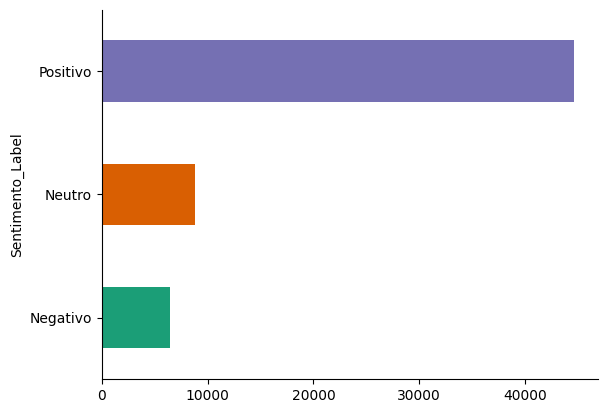

In [ ]:
# @title Sentimento_Label

from matplotlib import pyplot as plt
import seaborn as sns
df.groupby('Sentimento_Label').size().plot(kind='barh', color=sns.palettes.mpl_palette('Dark2'))
plt.gca().spines[['top', 'right',]].set_visible(False)

In [ ]:
df[['Comentario', 'Sentimento', 'Sentimento_Label']].head(10)

,Comentario,Sentimento,Sentimento_Label
0,A foto fica amarelada quando eu vou fotografar...,0.0000,Neutro
2,Muito bom.,0.4215,Positivo
3,Produto muito bom dei de presente pra meu filh...,0.8625,Positivo
4,Recomendo.,0.3612,Positivo
5,"Maravilhoso, potência perfeita em questão do p...",0.7269,Positivo
6,Saber recomendo ameiiii parabéns.,0.7506,Positivo
7,"O celular é muito bom , o preço também está bo...",0.9062,Positivo
8,Amei só preciso aprender a mexer nele.,0.0000,Neutro
9,Muito bom gostei muito recomendo.,0.7964,Positivo
10,Amei o celular!.,0.0000,Neutro


In [ ]:
df['Sentimento_Label'].value_counts()

,count
Sentimento_Label,
Positivo,44676
Neutro,8761
Negativo,6452


In [ ]:
df['Sentimento_Label'].value_counts().sum()

np.int64(59889)

In [ ]:
# Dos aproximadamento 60 mil comentários, 15% deles classificados como neutros.

In [ ]:
# Inicializa um dicionário para guardar os top 5 de cada sentimento
top5_por_sentimento = {}

# Itera sobre cada classe de sentimento
for sentimento in df['Sentimento_Label'].unique():
    # Filtra o DataFrame pelo sentimento atual
    df_filtrado = df[df['Sentimento_Label'] == sentimento]

    # Conta os comentários mais frequentes dentro desse sentimento
    top5 = df_filtrado['Comentario'].value_counts().head(5)

    # Armazena no dicionário
    top5_por_sentimento[sentimento] = top5

# Visualizar resultado
for sentimento, comentarios in top5_por_sentimento.items():
    print(f"\nTop 5 comentários com sentimento '{sentimento}':\n")
    print(comentarios)


Top 5 comentários com sentimento 'Neutro':

Comentario
Top.                154
Amei.               131
Ótima qualidade.     78
Adorei.              57
Lindo.               50
Name: count, dtype: int64

Top 5 comentários com sentimento 'Positivo':

Comentario
Muito bom.        424
Bom.              298
Excelente.        270
Ótimo.            262
Ótimo produto.    182
Name: count, dtype: int64

Top 5 comentários com sentimento 'Negativo':

Comentario
Ruim.           16
Muito ruim.     14
Muito fraco.    13
Sensacional.    10
Não presta.      7
Name: count, dtype: int64
